## Exercise 3

### Question 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
un = pd.read_csv('unvoting.csv')
un.head()

,Year,CountryAbb,CountryName,idealpoint,PctAgreeUS,PctAgreeRUSSIA
0,1946,USA,United States of America,1.713689,1.0,0.214286
1,1947,USA,United States of America,1.812884,1.0,0.263158
2,1948,USA,United States of America,1.936166,1.0,0.127451
3,1949,USA,United States of America,1.876619,1.0,0.111111
4,1950,USA,United States of America,1.810646,1.0,0.173077


In [3]:
# Plot the distribution of ideal points separately for 1980 and 2000
# —about 10 years before and 10 years after the fall of the Berlin Wall, respectively

un1980 = un.loc[un['Year'] > 1990]
un2000 = un.loc[un['Year'] <= 2000]

un1980.shape[0], un1980.shape[0]

(4045, 4045)

Text(-0.3, 1100, 'median')

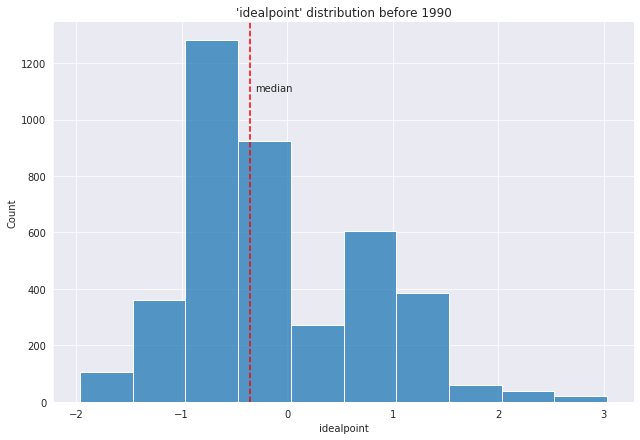

In [4]:
sns.set_style('darkgrid')

# 'idealpoint' distribution before 1990

sns.displot(
    data = un1980, x="idealpoint", binwidth=0.5, height=6, aspect=1.5
).set(title="'idealpoint' distribution before 1990")

# add a vertical line representing the median
plt.axvline(x=un1980['idealpoint'].median(), color='red', linestyle='--')

# add a text label for the median
plt.text(x=-0.3, y=1100, s='median')

Text(0, 1300, 'median')

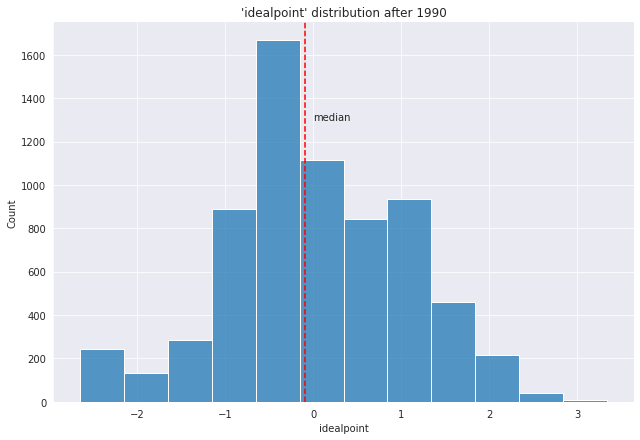

In [5]:
# 'idealpoint' distribution after 1990

sns.displot(
    data = un2000, x="idealpoint", binwidth=0.5, height=6, aspect=1.5
).set(title="'idealpoint' distribution after 1990")

plt.axvline(x=un2000['idealpoint'].median(), color='red', linestyle='--')

plt.text(x=0, y=1300, s='median')

In [6]:
# quantifying the patterns

np.quantile(un1980["idealpoint"], np.linspace(0,1,4))

array([-1.965152  , -0.5973355 ,  0.07839229,  3.01443   ])

In [7]:
np.quantile(un2000["idealpoint"], np.linspace(0,1,4))

array([-2.655213  , -0.41190387,  0.46660033,  3.01443   ])

### Question 2

<AxesSubplot:xlabel='Year', ylabel='value'>

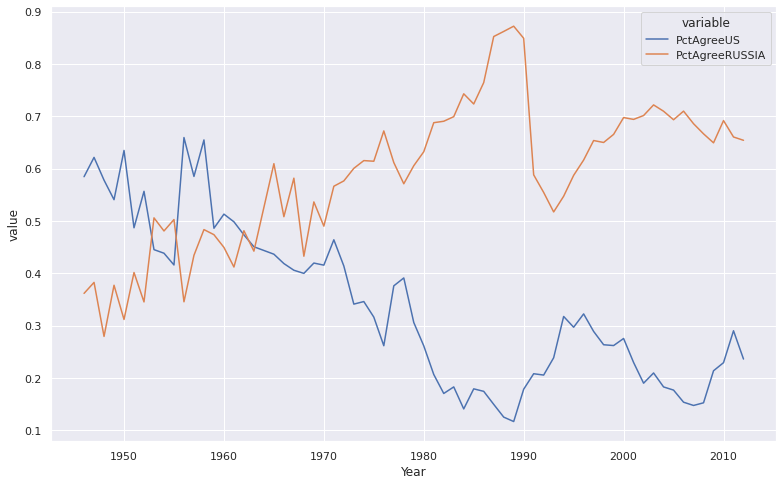

In [8]:
# examine how the number of countries voting with the United States and Russia has changed over time.

# Group by year and get the mean of percentages
agree_us_pct = un.groupby('Year')['PctAgreeUS'].mean().reset_index()
agree_ru_pct = un.groupby('Year')['PctAgreeRUSSIA'].mean().reset_index()

# Merge two dataset on year
df = pd.merge(agree_us_pct, agree_ru_pct, on='Year')

# plot the variable according to each variable, Year is the identifier column for pd.melt(),
# and PctAgreeUS/RUSSIA columns are the measured variables.

#setting figure size
sns.set(rc={'figure.figsize':(13,8)})

sns.lineplot(data=pd.melt(df, ['Year']), x='Year', y='value', hue='variable')
             

In [9]:
# Identify some countries that are consistently pro-US and pro-Russia

# pro-US
pro_us = un.groupby('CountryName')['PctAgreeUS'].mean()
pro_us.sort_values(ascending=False).head()

CountryName
United States of America    1.000000
Palau                       0.735633
United Kingdom              0.652100
Taiwan                      0.643011
Israel                      0.639908
Name: PctAgreeUS, dtype: float64

In [10]:
# pro-Russia
pro_ru = un.groupby('CountryName')['PctAgreeRUSSIA'].mean()
pro_ru.sort_values(ascending=False).head()

CountryName
Russia                        1.000000
German Democratic Republic    0.988835
Czechoslovakia                0.958042
Belarus                       0.924024
Ukraine                       0.887189
Name: PctAgreeRUSSIA, dtype: float64

### Question 3

In [11]:
# plotting the evolution of the two countries’ ideal points over time.

# subsetting to get yearly idealpoint variable regarding to US and Russia only

USA_RU_subset = un.loc[(un['CountryAbb'] == 'USA') | (un['CountryAbb'] == 'RUS')]
USA_RU_subset[['Year','idealpoint', 'CountryAbb']].head()

,Year,idealpoint,CountryAbb
0,1946,1.713689,USA
1,1947,1.812884,USA
2,1948,1.936166,USA
3,1949,1.876619,USA
4,1950,1.810646,USA


In [12]:
# creating a dataset where in which there are mean values of each year regarding to all countries 

all_countries = un.groupby('Year')['idealpoint'].mean().reset_index()
all_countries['CountryAbb'] = "All countries"
all_countries.head()

,Year,idealpoint,CountryAbb
0,1946,0.878918,All countries
1,1947,0.837604,All countries
2,1948,0.765981,All countries
3,1949,0.733457,All countries
4,1950,0.686996,All countries


In [17]:
# concatinating the two datasets 
df2 = pd.concat([USA_RU_subset[['Year','idealpoint', 'CountryAbb']] ,all_countries]).reset_index()
df2['CountryAbb'].unique()

array(['USA', 'RUS', 'All countries'], dtype=object)

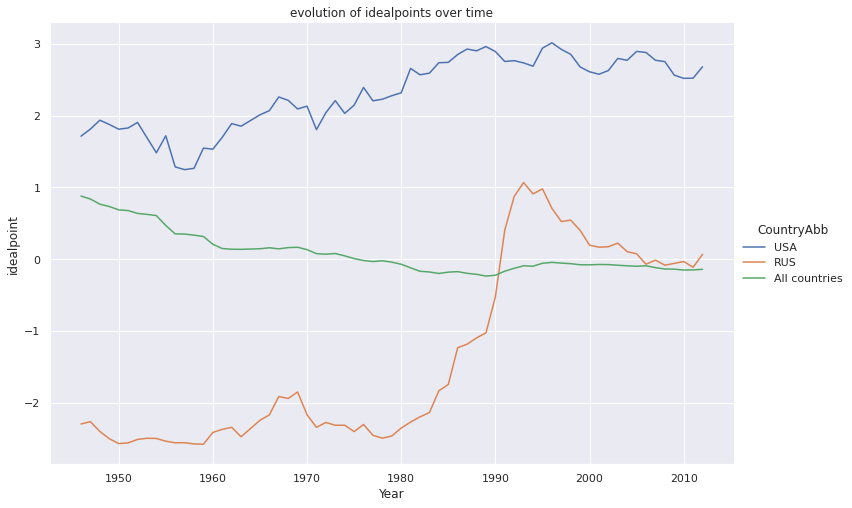

In [15]:
sns.relplot(
    data=df2, x='Year', y='idealpoint', hue='CountryAbb',
    aspect=1.5, kind='line', height=7
).set(title='evolution of idealpoints over time')

### Question 4